# Building a neural network to classify images of different items of clothing

In [1]:
## Importing necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt


# Importing a fashion dataset
from tensorflow.keras.datasets import fashion_mnist


## Data has already been sorted into training and test data
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
## Show the first training examples
print(f'Training Sample:\n{train_data[0]}\n')
print(f'Training Labels:\n{train_labels[0]}\n')

Training Sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [3]:
# Checking the shape of an example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

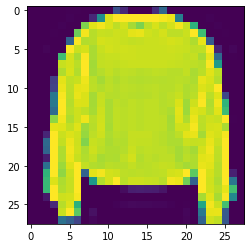

In [4]:
# Plotting a single example
plt.imshow(train_data[7])

In [5]:
# Creating a list for training labels so that they're readable with names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

Text(0.5, 1.0, 'Trouser')

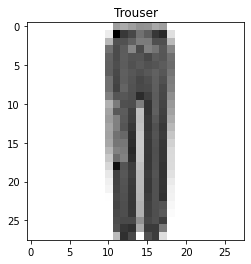

In [6]:
## Plot and example image and it's label

index_of_choice = 1000
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

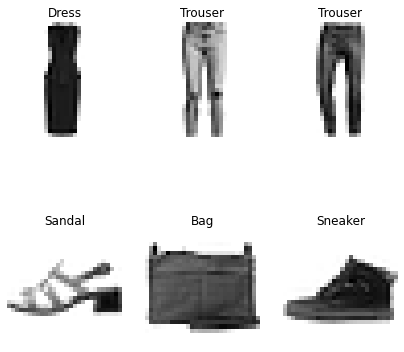

In [7]:
# Plot mu;tiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    rand_index= random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building a multi-class classification model

In [8]:
## For the model we must use following parameters
    # 1. The input shape is 28 x 28 (the shape of the image)
    # 2. Output shape = 10 (one per class clothing)
    # 3. Loss function = tf.keras.CategoricalCrossentropy()
    # 4. Output layer activation = softmax

In [9]:
# Our data need to flattened from `28 * 28` to `None, 784`

flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

(None, 784)

In [10]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28 ,28)),
tf.keras.layers.Dense(4,  activation='relu'),
tf.keras.layers.Dense(4, activation='relu'),
tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),


])


# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
non_norm_history = model_11.fit(train_data,
                              train_labels, 
                              epochs=10,
                              validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_accuracy:

In [11]:
# Check the m odel summary
model_11.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Check the min and max value of training data
train_data.max(), train_data.min()

(255, 0)

#### Neural networks prefers data to be scaled (i.e Normalized), this means they likely to have the number tensors they try to find patterns between 0 & 1

In [13]:
## We can make our data into normalized form by dividing it by maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled data
train_data_norm.min(), test_data_norm.max()

(0.0, 1.0)

In [14]:
## Lets improve our model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28 ,28)),
tf.keras.layers.Dense(4,  activation='relu'),
tf.keras.layers.Dense(4, activation='relu'),
tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),


])


# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                              train_labels, 
                              epochs=10,
                              validation_data=(test_data_norm, test_labels))


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

<AxesSubplot:title={'center':'Normalized-Data'}>

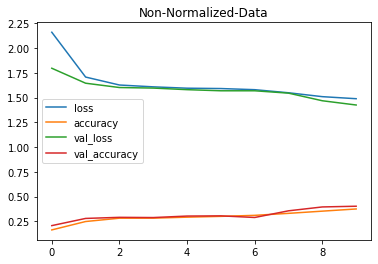

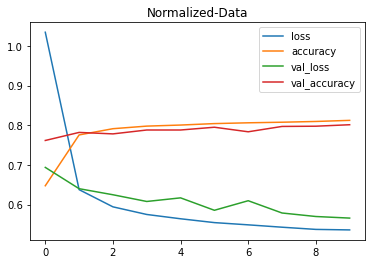

In [15]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title='Non-Normalized-Data')

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title='Normalized-Data')
